In [1]:
from DataParser import DataParser
from DataPreProcessing import DataPreProcessing
from FeatureExtraction import FeatureExtraction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys

# Data

In [2]:
df = DataParser().dataFrame

# Data Target

Encode *loan_status* as the target for model. 

Meaning of loan status is described below:

| Loan Status        | Meaning                                                                                                                                                                                                                                                                    |
|--------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Current            | Loan is up to date on all outstanding payments.                                                                                                                                                                                                                            |
| Fully Paid         | Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.                                                                                                                                                         |
| Charged Off        | Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance. |
| Late (31-120 days) | Loan has not been current for 31 to 120 days.                                                                                                                                                                                                                              |
| Issued             | New loan that has passed all LendingClub reviews, received full funding, and has been issued.                                                                                                                                                                              |
| In Grace Period    | Loan is past due but within the 15-day grace period.                                                                                                                                                                                                                       |
| Late (16-30 days)  | Loan has not been current for 16 to 30 days.                                                                                                                                                                                                                               |
| Default            | Loan has not been current for 121 days or more.    


### Remove in-progress loans
Remove loans that have not yet terminated from the data set as they are not be suitable for training. 

In [3]:
df.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [4]:
df = DataPreProcessing().remove_in_progress_loans(df)

In [5]:
df.loan_status.value_counts()

Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

### Categorise loan_status

Let's split the `loan_status` into 3 classes: bad, warning and safe.


<table>
  <tr>
    <td>Loan Status</td>
    <td>Class</td>
    <td>Code</td>
  </tr>
  <tr>
    <td>Fully Paid</td>
    <td rowspan="2">Safe</td>
    <td rowspan="2">2</td>
  </tr>
  <tr>
    <td>Does not meet the credit policy. Status:Fully Paid</td>
  </tr>
  <tr>
    <td>Late (31-120 days)</td>
    <td rowspan="3">Warning</td>
    <td rowspan="3">1</td>
  </tr>
  <tr>
    <td>Late (16-30 days)</td>
  </tr>
  <tr>
    <td>In Grace Period (Late (1-15 days)</td>
  </tr>
  <tr>
    <td>Charged Off</td>
    <td rowspan="3">Bad</td>
    <td rowspan="3">0</td>
  </tr>
  <tr>
    <td>Does not meet the credit policy. Status:Charged Off</td>
  </tr>
  <tr>
    <td>Default</td>
  </tr>
</table>

In [6]:
df = DataPreProcessing().encode_loan_status(df)

In [7]:
df.loan_status_encoded.value_counts()

2    218171
0     47228
1     20201
Name: loan_status_encoded, dtype: int64

# Pre-Processing 

### Remove Blanks

Remove column from dataset if the number of null values is greater than X.  

In [8]:
df = DataPreProcessing().remove_null_values(df)

### Remove Redundant Columns



'url' = a list of invalid urls
'

In [9]:
df = DataPreProcessing().remove_columns(df, ['url'])




# Feature Engineering

### loan_amnt 
* loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

hello


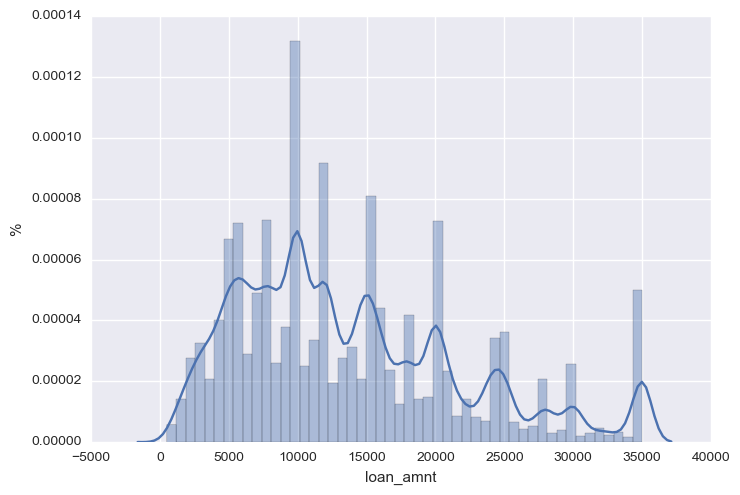

In [10]:
sns.distplot(df["loan_amnt"])
plt.ylabel("%")
print "hello"

In [11]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec     

In [12]:
df = DataPreProcessing().remove_non_numerical_cats(df)

In [13]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
int_rate                      float64
installment                   float64
annual_inc                    float64
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_prncp               float64
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
last_pymnt_amnt               float64
collections_